### Importando as libs:

In [30]:
# import nltk
# nltk.download()

In [134]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')

### Lendo arquivos e limpando as bases

In [2]:
books_data = pd.read_csv('books_data.csv')

In [17]:
print(books_data.info())
print(books_data.isnull().sum())
print(books_data.isna().sum())
print(books_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB
None
Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64
Title                 1
description   

In [3]:
Books_rating = pd.read_csv('Books_rating.csv')

In [15]:
print(Books_rating.info())
print(Books_rating.isnull().sum())
print(Books_rating.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           object 
 1   Title        object 
 2   Price        float64
 3   User_id      object 
 4   profileName  object 
 5   score        float64
 6   time         int64  
 7   summary      object 
 8   text         object 
dtypes: float64(2), int64(1), object(6)
memory usage: 206.0+ MB
None
Id                   0
Title              208
Price          2518829
User_id         561787
profileName     561905
score                0
time                 0
summary            407
text                 8
dtype: int64
               Price         score          time
count  481171.000000  3.000000e+06  3.000000e+06
mean       21.762656  4.215289e+00  1.132307e+09
std        26.206541  1.203054e+00  1.493202e+08
min         1.000000  1.000000e+00 -1.000000e+00
25%        10.780000  4.000000e+00  9.999072e+08
50%        14.93000

In [4]:
books_merged = pd.merge(books_data, Books_rating, on='Title', how='inner')

In [5]:
books_merged['categories'] = books_merged['categories'].apply(lambda x: x.strip("[]'") if isinstance(x, str) else x)
books_merged['authors'] = books_merged['authors'].apply(lambda x: x.strip("[]'").replace("', '", ",") if isinstance(x, str) else x)

In [6]:
books_merged.categories.value_counts()

categories
Fiction                               824439
Juvenile Fiction                      207542
Biography & Autobiography             107791
Religion                               98035
History                                89988
                                       ...  
Drug addicts                               1
Scrapbooks                                 1
Night flying                               1
Romanian language                          1
Flame in the wind (Motion picture)         1
Name: count, Length: 10883, dtype: int64

In [7]:
books_merged.authors.value_counts()

authors
J. R. R. Tolkien                       37268
Jane Austen                            36532
Charles Dickens                        21270
John Steinbeck                         17027
John Ronald Reuel Tolkien              12906
                                       ...  
Smart Alec,David Mostyn                    1
Quin Sherrer,Ruthanne Garlock              1
Eznik                                      1
Trevor C. Bailey,Anthony C. Gatrell        1
Julie Strain                               1
Name: count, Length: 127278, dtype: int64

In [8]:
# Converter as iniciais, agrupar autores como John Ronald Reuel Tolkien para J. R. R. Tolkien
def convert_to_initials(name):
    if isinstance(name, str):
        name_parts = name.strip().split()
        if len(name_parts) > 1:
            initials = [part[0] + '.' for part in name_parts[:-1]]
            last_name = name_parts[-1]
            return ' '.join(initials + [last_name])
        else:
            return name
    return name

def process_authors(authors_list):
    if isinstance(authors_list, list):
        processed_authors = [convert_to_initials(author.strip()) for author in authors_list if isinstance(author, str)]
        return ', '.join(processed_authors)
    elif isinstance(authors_list, str):
        return convert_to_initials(authors_list.strip())
    else:
        return ''

books_merged['authors_cut'] = books_merged['authors'].apply(process_authors)

In [11]:
books_merged.authors_cut.value_counts().head(10)

authors_cut
                    390635
J. R. R. Tolkien     50186
J. Austen            36532
C. Dickens           21270
J. Steinbeck         17027
C. S. Lewis          13020
L. Carroll           12896
K. Vonnegut          12124
H. Lee               12022
C. Brontë            11875
Name: count, dtype: int64

In [26]:
print(books_merged.info())
print(books_merged.isnull().sum())
print(books_merged.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Title          object 
 1   description    object 
 2   authors        object 
 3   image          object 
 4   previewLink    object 
 5   publisher      object 
 6   publishedDate  object 
 7   infoLink       object 
 8   categories     object 
 9   ratingsCount   float64
 10  Id             object 
 11  Price          float64
 12  User_id        object 
 13  profileName    object 
 14  score          float64
 15  time           int64  
 16  summary        object 
 17  text           object 
 18  authors_cut    object 
dtypes: float64(3), int64(1), object(15)
memory usage: 434.9+ MB
None
Title                208
description       640225
authors           390634
image             540306
previewLink       330623
publisher         782617
publishedDate     354581
infoLink          330623
categories        551498
rati

In [27]:
missing_values = books_merged.isnull().sum()
print(missing_values[missing_values > 0])

Title                208
description       640225
authors           390634
image             540306
previewLink       330623
publisher         782617
publishedDate     354581
infoLink          330623
categories        551498
ratingsCount     1360694
Price            2518829
User_id           561787
profileName       561905
summary              407
text                   8
dtype: int64


# 1. Análise exploratória

### Plots referentes aos reviews

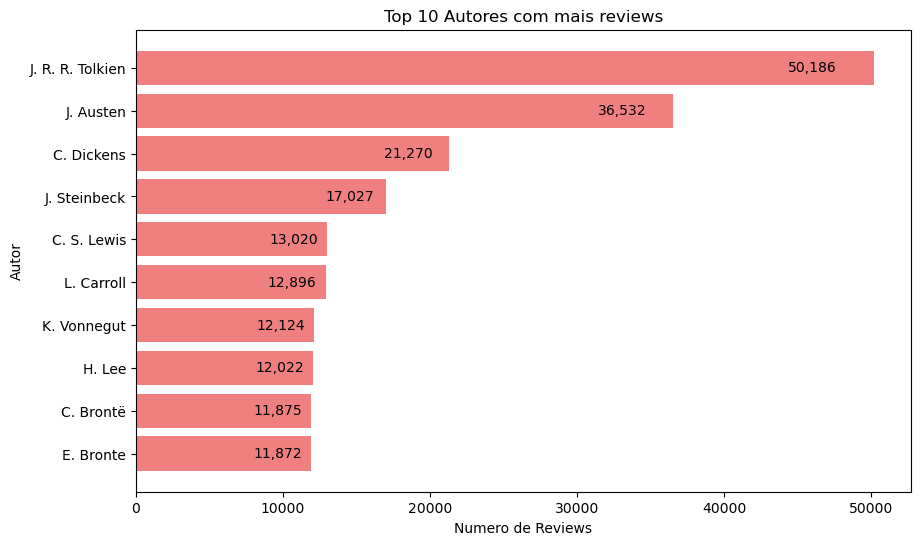

In [75]:
plt.figure(figsize=(10, 6))
bars = plt.barh(authors_count['authors_cut'], authors_count['Review Count'], color='lightcoral')

for bar in bars:
    width = bar.get_width()
    formatted_number = "{:,}".format(int(width))
    plt.text(width - (width * 0.05),
             bar.get_y() + bar.get_height() / 2,
             formatted_number,
             va='center', ha='right', color='black')

plt.xlabel('Numero de Reviews')
plt.ylabel('Autor')
plt.title('Top 10 Autores com mais reviews')
plt.gca().invert_yaxis()
plt.show()

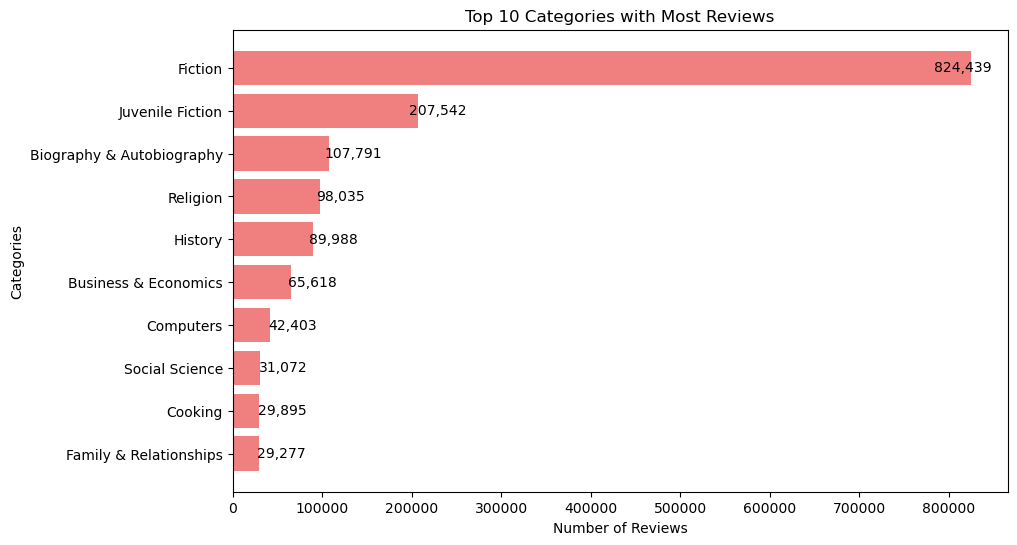

In [74]:
categories_count = books_merged['categories'].value_counts().reset_index()
categories_count.columns = ['categories', 'Review Count']
categories_count = categories_count.head(10)


plt.figure(figsize=(10, 6))
bars = plt.barh(categories_count['categories'], categories_count['Review Count'], color='lightcoral')

for bar in bars:
    width = bar.get_width()
    formatted_number = "{:,}".format(int(width))
    plt.text(width - (width * 0.05),
             bar.get_y() + bar.get_height() / 2,
             formatted_number,
             va='center', ha='left', color='black')

    
plt.xlabel('Number of Reviews')
plt.ylabel('Categories')
plt.title('Top 10 Categories with Most Reviews')
plt.gca().invert_yaxis()
plt.show()

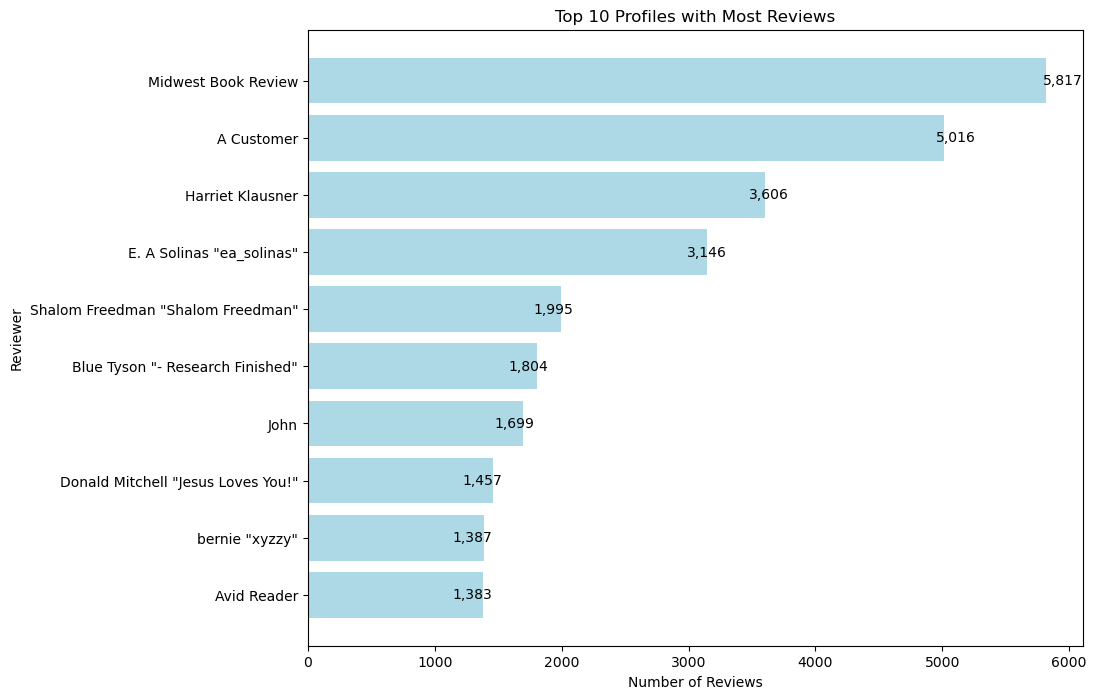

In [73]:
profile_count = books_merged['profileName'].value_counts().reset_index()
profile_count.columns = ['profileName', 'Review Count']
profile_count = profile_count.head(10)

plt.figure(figsize=(10, 8))
bars = plt.barh(profile_count['profileName'], profile_count['Review Count'], color='lightblue')

for bar in bars:
    width = bar.get_width()
    formatted_number = "{:,}".format(int(width))
    plt.text(width + (width * 0.05),
             bar.get_y() + bar.get_height() / 2,
             formatted_number,
             va='center', ha='right', color='black')

plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.title('Top 10 Profiles with Most Reviews')
plt.gca().invert_yaxis()
plt.show()

In [43]:
df = books_merged.copy()

## Pre-processamento
### Removendo pontuação e Stopwords

In [44]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        text = text.lower()
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    else:
        return '' 


books_merged['text_clean'] = books_merged['text'].apply(clean_text)

### Lematização --> Como usaremos o VADER , não preciamos lidar com lematização ou stemming, por conta de já contar com um lexico próprio voltado para interações em redes sociais. Intensidade e contexto podem se perder se aplicado essa técnica, por exemplo: Happy é menos positivo que Happier, então acaba perdendo o aumento de positividade na sentença, atribuindo um score menor. 
### •O mesmo acontece com sensibilidade de contexto: algumas palavras não são apenas variações delas, mas são sensiveis ao contexto: worse é negativo, e better é positivo, mas se ocorrer a lematização, perdemos a variação de negativo e positivo.

#### PS: Mas caso fosse necessário, faria dessa forma:

In [135]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_lemmatized(text, remove_stopwords=True, lemmatize=True):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    if remove_stopwords:
        words = [word for word in words if word not in stop_words]

    if lemmatize:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    cleaned_text = ' '.join(words)
    return cleaned_text

books_merged['text_lemmatized'] = books_merged['text'].apply(clean_text_lemmatized)

NameError: name 'stop' is not defined

## Voltando ao VADER - Valence Aware Dictionary and sEntiment Reasoner

In [76]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [77]:
#nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [83]:
books_merged_sample = books_merged.sample(1000)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,score,time,summary,text,authors_cut,text_clean
2866418,Black Fag,NaN,United States. Bureau of Foreign and Domestic ...,http://books.google.com/books/content?id=VfcTW...,http://books.google.com/books?id=VfcTWPf8-QwC&...,NaN,1916,https://play.google.com/store/books/details?id...,Commerce,NaN,1892061236,NaN,AG3R4DPIXQSOJ,Christopher Robin,5.0,1101168000,"Humor, Truth, and Queer Tenderness: Black Fag",Black Fag by Shane AllisonThere is currently n...,U. S. B. o. F. a. D. Commerce,black fag shane allisonthere currently poet ma...
2149671,"Maskerade (Discworld, Book 18)",'There's a kind of magic in masks. Masks conce...,Terry Pratchett,http://books.google.com/books/content?id=BjDvz...,http://books.google.com/books?id=BjDvzgEACAAJ&...,Discworld Novels,2022-04-28,http://books.google.com/books?id=BjDvzgEACAAJ&...,NaN,47.0,0753105187,NaN,A2NZB0JHPN9WUT,"panda princess ""tweaking panda""",4.0,1358985600,The only book I'm happy to read more than once!,Sir Pratchett is so excellent at his story tel...,T. Pratchett,sir pratchett excellent story telling art alwa...
426574,The Macarthur Study Bible ~ New King James Ver...,Over 1 million MacArthur Study Bibles sold! Fe...,John MacArthur,http://books.google.com/books/content?id=2EVwP...,http://books.google.com/books?id=2EVwPgAACAAJ&...,Thomas Nelson Publishers,2010-03-24,http://books.google.com/books?id=2EVwPgAACAAJ&...,Bibles,NaN,0849912229,NaN,A1Y7MT67ZE8KJE,V. Sanchez,5.0,1305849600,MacArthur Study Bible,The MacArthur study bible is a useful tool in ...,J. MacArthur,macarthur study bible useful tool bible study ...
1897282,"Little women: Or Meg, Jo, Beth, and Amy",2018 marks the 150th anniversary of the classi...,Rey Terciero,http://books.google.com/books/content?id=mymGt...,http://books.google.nl/books?id=mymGtAEACAAJ&d...,"Little, Brown Books for Young Readers",2019-02-05,http://books.google.nl/books?id=mymGtAEACAAJ&d...,Juvenile Fiction,3.0,B0007EGQ52,NaN,A3IK9XHM40V1RX,Courtney Rose,5.0,1341878400,Great book!,The download was very quick! I've always enjoy...,R. Terciero,download quick ive always enjoyed story please...
1705533,The Effect of Gamma Rays on Man-In-The-Moon Ma...,Paul Zindel's compelling and inspirational Pul...,Paul Zindel,http://books.google.com/books/content?id=-8akE...,http://books.google.com/books?id=-8akEp4jC98C&...,Graymalkin Media,2012-10-01,https://play.google.com/store/books/details?id...,Drama,10.0,0808508644,NaN,NaN,NaN,5.0,905558400,I liked it,At first I had my doubts about this book becau...,P. Zindel,first doubts book seemed complicated several p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018589,Tess of the D'Urbervilles,A heartbreaking portrayal of a woman faced by ...,Thomas Hardy,http://books.google.com/books/content?id=P74zE...,http://books.google.nl/books?id=P74zEAAAQBAJ&d...,Penguin,2003-05-27,http://books.google.nl/books?id=P74zEAAAQBAJ&d...,Fiction,NaN,0451515471,NaN,NaN,NaN,5.0,912038400,Mechanical Female,Tess is a very difficult book and I would not ...,T. Hardy,tess difficult book would recommend average ol...
1558987,To kill a mockingbird,Voted America's Best-Loved Novel in PBS's The ...,Harper Lee,http://books.google.com/books/content?id=PGR2A...,http://books.google.com/books?id=PGR2AwAAQBAJ&...,Harper Collins,2014-07-08,https://play.google.com/store/books/details?id...,Fiction,2164.0,B0007DRGI4,NaN,A2JSX6ZJBOCZ8B,zelda3@airmail.net,5.0,897436800,My favorite book of all time,I first read this book in 9th grade English cl...,H. Lee,first read book 9th grade english class suppos...
1510641,Extinct,"Just 28,000 years ago, the blink of an eye in ...",Clive Finlayson,http://books.google.com/books/content?id=uCHsf...,http://books.google.com/books?id=uCHsf-UxnAcC&...,OUP Oxford,2009-09-24,https://play.google.com/store/books/details?id...,Nature,8.0,0312962126,NaN,A19B0GTBYVO2OL,"C.

In [81]:
books_merged['vader_sentiment'] = books_merged['text_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorias do vader: 'positive', 'negative', or 'neutral'
books_merged['sentiment_label'] = books_merged['vader_sentiment'].apply(
    lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
)

                                                text_clean  vader_sentiment  \
2998588  hamilton case mesmerizing brutal look decay he...          -0.9657   
2032376  ordered book received charles prince wales ins...          -0.4019   
1213158  new plays abbey theatre vol 2 19961998 welcome...           0.9817   
1942111  never read mcbains books thought best place st...           0.9682   
266652   funny especially part newt drinking glass clas...           0.7096   

        sentiment_label  
2998588        negative  
2032376        negative  
1213158        positive  
1942111        positive  
266652         positive  


### Processo Oneroso, BERT precisa de mais poder computacional --> Por isso utilizaremos uma versão comprimida, o Distillbert

### Referencia: https://huggingface.co/docs/transformers/model_doc/distilbert


The DistilBERT model was proposed in the blog post Smaller, faster, cheaper, lighter: Introducing DistilBERT, a distilled version of BERT, and the paper DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than google-bert/bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

In [28]:
# from transformers import BertTokenizer, BertModel
# import torch
# 
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')
# 
# def get_embeddings(text):
#     inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
# 
# books_merged['embeddings'] = books_merged['text_clean'].apply(get_embeddings)


KeyboardInterrupt



## Continuação da Análise exploratória

In [53]:
print(books_merged.info())
print(books_merged.isnull().sum())
print(books_merged.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2095009 to 2952097
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   Title            10000 non-null  object 
 2   Price            1571 non-null   float64
 3   User_id          8088 non-null   object 
 4   profileName      8087 non-null   object 
 5   score            10000 non-null  float64
 6   time             10000 non-null  int64  
 7   summary          9998 non-null   object 
 8   text             10000 non-null  object 
 9   text_clean       10000 non-null  object 
 10  vader_sentiment  10000 non-null  float64
 11  sentiment_label  10000 non-null  object 
 12  text_length      10000 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
None
Id                    0
Title                 0
Price              8429
User_id            1912
profileName        1913
score      

In [ ]:
df = books_merged.copy()

C:\Users\alexa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


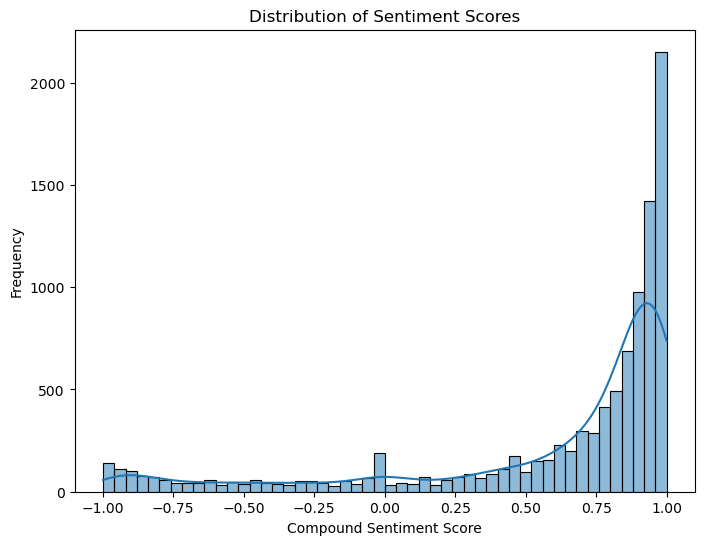

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of compound sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(df['vader_sentiment'], kde=True, bins=50)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

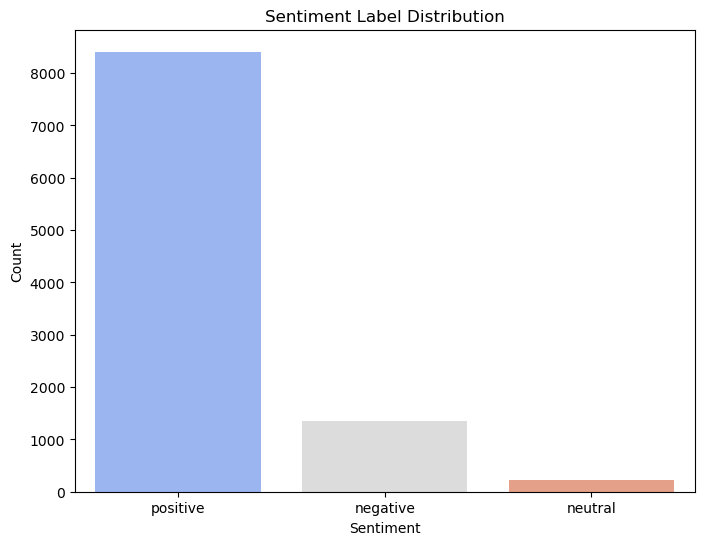

In [43]:
# Plot the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


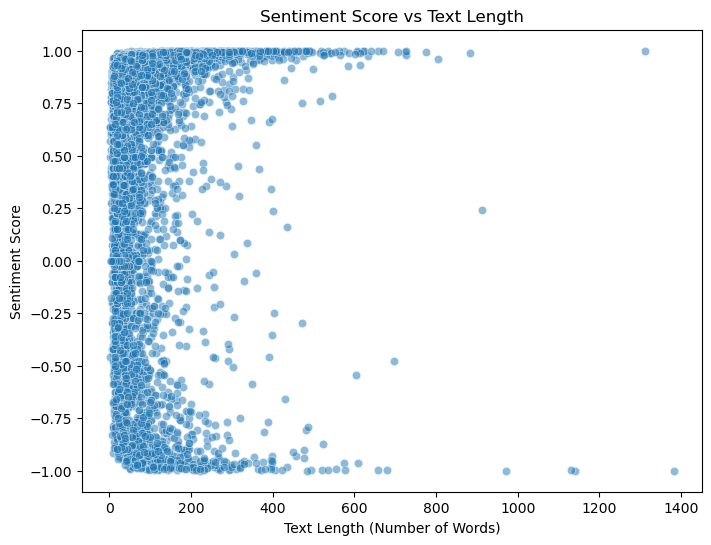

In [44]:
# Add a new column for text length (number of words)
df['text_length'] = df['text_clean'].apply(lambda x: len(x.split()))

# Plot the relationship between text length and sentiment score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='vader_sentiment', data=df, alpha=0.5)
plt.title('Sentiment Score vs Text Length')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Sentiment Score')
plt.show()


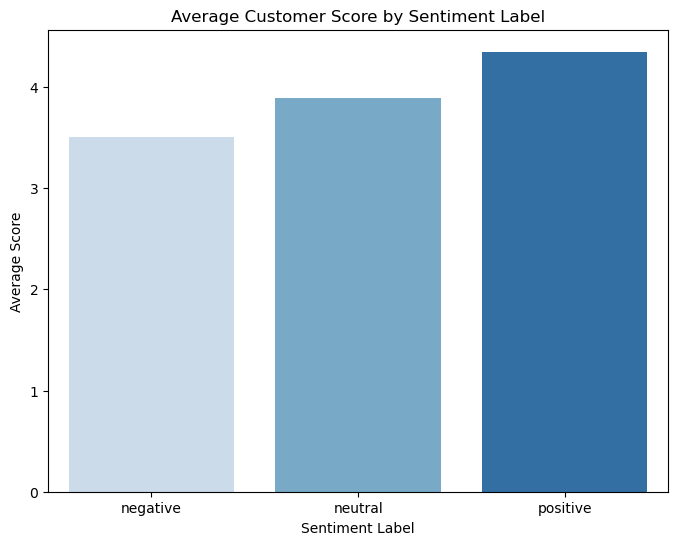

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_scores_by_sentiment.index, y=avg_scores_by_sentiment.values, palette='Blues')
plt.title('Average Customer Score by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Score')
plt.show()


              score
count  10000.000000
mean       4.223300
std        1.194311
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
sentiment_label
positive    8410
negative    1361
neutral      229
Name: count, dtype: int64
count    10000.000000
mean         4.223300
std          1.194311
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64
sentiment_label
negative    3.509919
neutral     3.890830
positive    4.347800
Name: score, dtype: float64


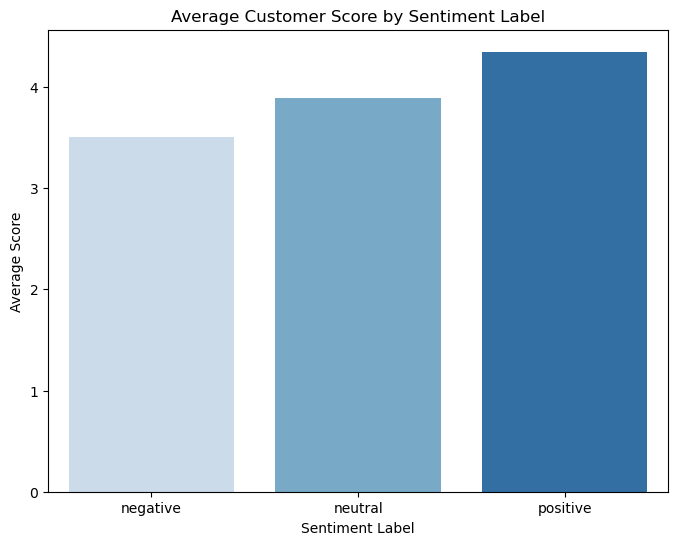

Correlation between sentiment and score:
                    sentiment_numeric     score
sentiment_numeric           1.000000  0.243836
score                       0.243836  1.000000
ANOVA test result: F-statistic = 316.10294273388024, p-value = 7.661443439196543e-134


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Check basic statistics
print(df_cleaned[['sentiment_label', 'score']].describe())

# Check the distribution of sentiment labels and scores
print(df_cleaned['sentiment_label'].value_counts())
print(df_cleaned['score'].describe())

# Step 2: Group by sentiment_label and compute the average score
avg_scores_by_sentiment = df_cleaned.groupby('sentiment_label')['score'].mean()
print(avg_scores_by_sentiment)

# Step 3: Plot the average score by sentiment label
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_scores_by_sentiment.index, y=avg_scores_by_sentiment.values, palette='Blues')
plt.title('Average Customer Score by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Score')
plt.show()

# Step 4: Convert sentiment labels to numerical values
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df_cleaned['sentiment_numeric'] = df_cleaned['sentiment_label'].map(sentiment_map)

# Step 5: Calculate the correlation between sentiment_numeric and score
correlation = df_cleaned[['sentiment_numeric', 'score']].corr()
print("Correlation between sentiment and score:\n", correlation)

# Step 6: Optional - Perform ANOVA test to check if score differs significantly by sentiment
positive_scores = df_cleaned[df_cleaned['sentiment_label'] == 'positive']['score']
neutral_scores = df_cleaned[df_cleaned['sentiment_label'] == 'neutral']['score']
negative_scores = df_cleaned[df_cleaned['sentiment_label'] == 'negative']['score']

f_statistic, p_value = stats.f_oneway(positive_scores, neutral_scores, negative_scores)
print(f"ANOVA test result: F-statistic = {f_statistic}, p-value = {p_value}")


#### Existe uma correlação, embora fraca, entre sentimento e score, mas não é tão grande.

In [65]:
avg_scores_by_sentiment = df_cleaned.groupby('sentiment_label')['score'].mean()
print(avg_scores_by_sentiment)

sentiment_label
negative    3.509919
neutral     3.890830
positive    4.347800
Name: score, dtype: float64


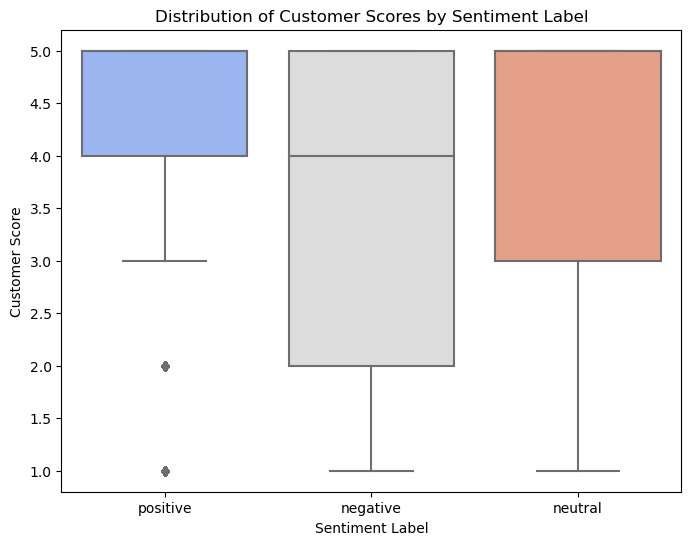

In [70]:
# Boxplot to visualize the distribution of scores by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='score', data=df_cleaned, palette='coolwarm')
plt.title('Distribution of Customer Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Customer Score')
plt.show()


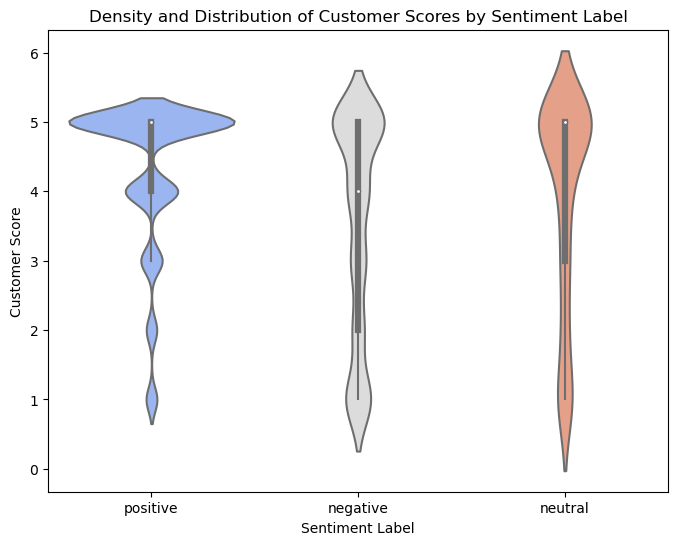

In [75]:
# Plot the distribution of scores for each sentiment label using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='sentiment_label', y='score', data=df_cleaned, palette='coolwarm')
plt.title('Density and Distribution of Customer Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Customer Score')
plt.show()


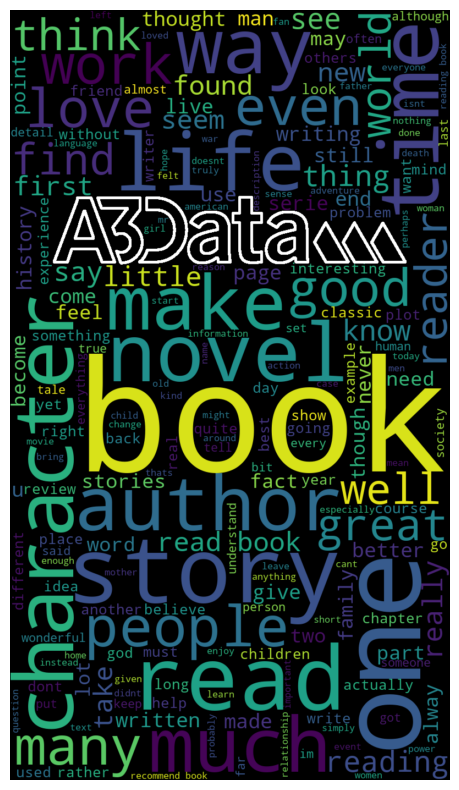

In [84]:
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt


logo_path = 'a3data_logo.png'  
logo_image = Image.open(logo_path)

logo_gray = logo_image.convert('L')
logo_mask = np.array(logo_gray)
threshold = 200
logo_mask = np.where(logo_mask > threshold, 255, 0)
logo_mask = np.where(logo_mask == 255, 0, 255)


height, width = logo_mask.shape 
new_mask = np.zeros((1400, width))
new_mask[:height, :] = logo_mask

wordcloud = WordCloud(
    mask=new_mask,
    contour_width=8, 
    contour_color='white', 
    background_color='black', 
    width=800,  
    height=800,  
    colormap='viridis' 
).generate(text)


plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sumarização -> DistillBart

In [107]:
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

book = books_merged_sample[books_merged_sample['Title'] == "The Hobbit"]
text2 = book['text_clean'].values[0]
summary = summarizer(text2, max_length=150, min_length=50, do_sample=False)
print(summary[0]['summary_text'])


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

C:\Users\alexa\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alexa\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


 book awesome imagine read 3 times since read lord rings part 1 2 part 3 part 3 book sweet inspired write stories . Read the original version of this book, "Lord rings" Read the full version of the book and the excerpt from the first part of this series .


## Utilização de bases de conhecimento

### Poderiamos incorporar um lexicon personalizado criado pelo time, como no exemplo abaixo:

In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# 
# custom_lexicon = {
#     "tragic": -0.8,
#     "joyful": 0.9,
#     "romantic": 0.7,
#     "mysterious": 0.5
# }
# 
# sid = SentimentIntensityAnalyzer()
# sid.lexicon.update(custom_lexicon)
# 
# text = "The tragic end of the novel left me joyful but also mysterious."
# sentiment = sid.polarity_scores(text)
# sentiment

### Ou aproveitar um lexicon já específico para o nosso uso de caso, como literatura por exemplo:

In [126]:
train_dataset = books_merged_sample.sample(10000)
test_dataset = books_merged_sample.sample(1000)

In [127]:
from datasets import Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from transformers import Trainer


train_dataset = Dataset.from_pandas(books_merged_sample[['text_clean', 'sentiment_label']])
print(train_dataset)

Dataset({
    features: ['text_clean', 'sentiment_label', '__index_level_0__'],
    num_rows: 1000
})


In [128]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def preprocess_function(examples):
    return tokenizer(examples['text_clean'], truncation=True, padding=True)

train_dataset = train_dataset.map(preprocess_function, batched=True)
labels = {'positive': 0, 'negative': 1, 'neutral': 2}
train_dataset = train_dataset.map(lambda examples: {'labels': [labels[label] for label in examples['sentiment_label']]}, batched=True)
train_dataset = train_dataset.shuffle(seed=42)
train_dataset = train_dataset.train_test_split(test_size=0.2)
print(train_dataset)

C:\Users\alexa\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [130]:
# Load the pre-trained DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)  # Adjust num_labels to the number of sentiment categories

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [132]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",          # output directory
    evaluation_strategy="epoch",     # evaluation strategy to adopt during training
    learning_rate=2e-5,              # learning rate
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    num_train_epochs=3,              # number of training epochs
    weight_decay=0.01,               # strength of weight decay
    logging_dir="./logs",            # directory for storing logs
)

trainer = Trainer(
    model=model,                         # the model to train
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset['train'], # training dataset
    eval_dataset=train_dataset['test'],  # evaluation dataset
    tokenizer=tokenizer,                 # tokenizer to preprocess the data
)

trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
inputs = tokenizer("Your text input here", return_tensors="pt")
outputs = model(**inputs)

predicted_class = outputs.logits.argmax(dim=-1)
print(predicted_class)

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

In [116]:
train_dataset = Dataset.from_pandas(train_dataset)

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

train_dataset = train_dataset.map(preprocess_function)

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

In [118]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)  # Binary classification (positive/negative)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',           # Directory to save the model and logs
    num_train_epochs=3,               # Number of epochs
    per_device_train_batch_size=8,    # Batch size for training
    per_device_eval_batch_size=8,     # Batch size for evaluation
    warmup_steps=500,                 # Number of warmup steps
    weight_decay=0.01,                # Weight decay for regularization
    logging_dir='./logs',             # Directory for logging
    logging_steps=10,                 # Log every 10 steps
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()
results = trainer.evaluate()
print(results)
# Load the fine-tuned model
model.eval()
# Create a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
# Example: Predict the sentiment of a new text
text = "The book was deeply moving, with layers of complexity that left me thinking for days."
result = sentiment_pipeline(text)
print(result)

## Questions and answers --> DistillBert

In [104]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering, pipeline

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-uncased-distilled-squad")
qa_pipeline = pipeline("question-answering", model=model, tokenizer=tokenizer)

book = books_merged_sample[books_merged_sample['Title'] == "The Hobbit"]
context = book['text_clean'].values[0]  # Get the cleaned text of the book
question = "Is this a good book?"

# Get the answer from the model
result = qa_pipeline(question=question, context=context)
print(f"Answer: {result['answer']}")
print(result)

Answer: sweet inspired write stories
{'score': 0.30424195528030396, 'start': 77, 'end': 104, 'answer': 'sweet inspired write stories'}


## Impactos

#### • Objetivo Principal: Automatizar o processo de análise de avaliações de livros, oferecendo uma solução eficiente e escalável.

#### • Impacto Esperado: Redução do tempo de análise, Identificar sentimentos referente às obras

#### • Próximos Passos: Criação de um léxico próprio para fine-tuning dependendo da categoria do livro, entrevista com os top reviwers;